# Exploring multi-shell LEO constellation designs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (22, 10)
plt.rcParams.update({'font.size': 45})

## Only throughput for the paper

Comparing the throughputs over 24 hours between single shell, intershell ISL with two and three shells

8.002836237424459


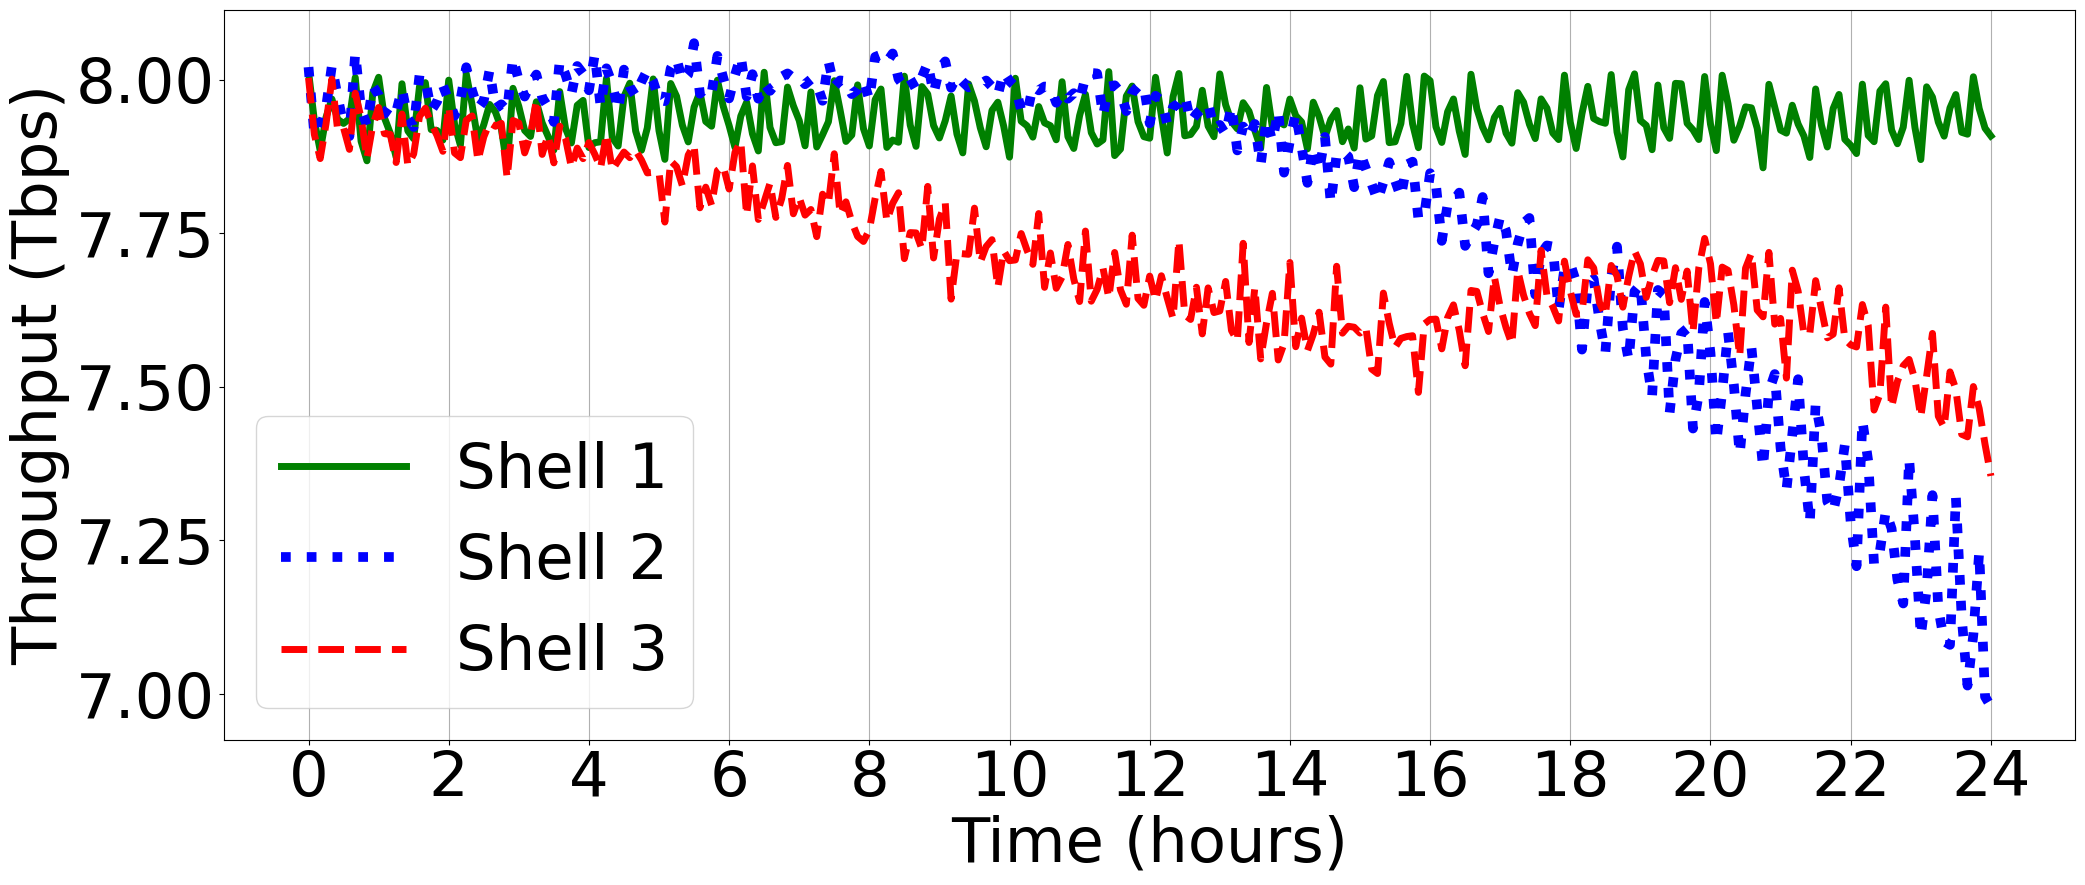

In [2]:
df1 = pd.read_csv(
    'CSVs/multi_shell_design/SS_ISL_h_24.csv').sort_values(by='time_delta')
df1['time_delta'] = df1['time_delta']*24
df1['throughput_Gbps'] = df1['throughput_Gbps']/1000


df2 = pd.read_csv(
    'CSVs/multi_shell_design/IS2_ISL_h_24.csv').sort_values(by='time_delta')
df2['time_delta'] = df2['time_delta']*24
df2['throughput_Gbps'] = df2['throughput_Gbps']/1000


df3 = pd.read_csv(
    'CSVs/multi_shell_design/IS3_ISL_h_24.csv').sort_values(by='time_delta')
df3['time_delta'] = df3['time_delta']*24
df3['throughput_Gbps'] = df3['throughput_Gbps']/1000


print(df3['throughput_Gbps'].max())

x_line = [h for h in range(0, 25, 2)]
fig, ax1 = plt.subplots()
ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')

# Throughput
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Throughput (Tbps)')
line1 = ax1.plot(df1['time_delta'], df1['throughput_Gbps'],
                 label='Shell 1', color='g', linewidth=5,)
line2 = ax1.plot(df2['time_delta'], df2['throughput_Gbps'],
                 label='Shell 2', color='b', linewidth=7, linestyle='dotted')
line3 = ax1.plot(df3['time_delta'], df3['throughput_Gbps'],
                 label='Shell 3', color='r', linewidth=5, linestyle='dashed')

ax1.tick_params(axis='y')

# Coverage
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# # we already handled the x-label with ax1
# ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
# line3 = ax2.plot(df['time_delta'], df['GS_coverage_metric'], label='Coverage metrics', linestyle='dashed', linewidth=6)
# line4 = ax2.plot(df['time_delta'], df['dead_GS_count'], label='# Disconnected GS', linestyle='dotted', color='black', linewidth=7)
# ax2.tick_params(axis='y')

fig.tight_layout()
lines = line1+line2+line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)
plt.tight_layout()
# plt.savefig('figures/intershell_ISLs/throughput.png')
plt.show()

## Bar chart comparing the throughput of one to multi shell designs

In [3]:
def read_csv_for_bar_plot(fname: str)-> list[float]:
    df = pd.read_csv(fname)
    return [round(v/1000, 1) for v in df['gbps'].to_list()]

### Starlink

[1.3]
[1.3]
[2.  2.2 2.4]
[1.9 2.2 2.5]
[3.]
[3.]


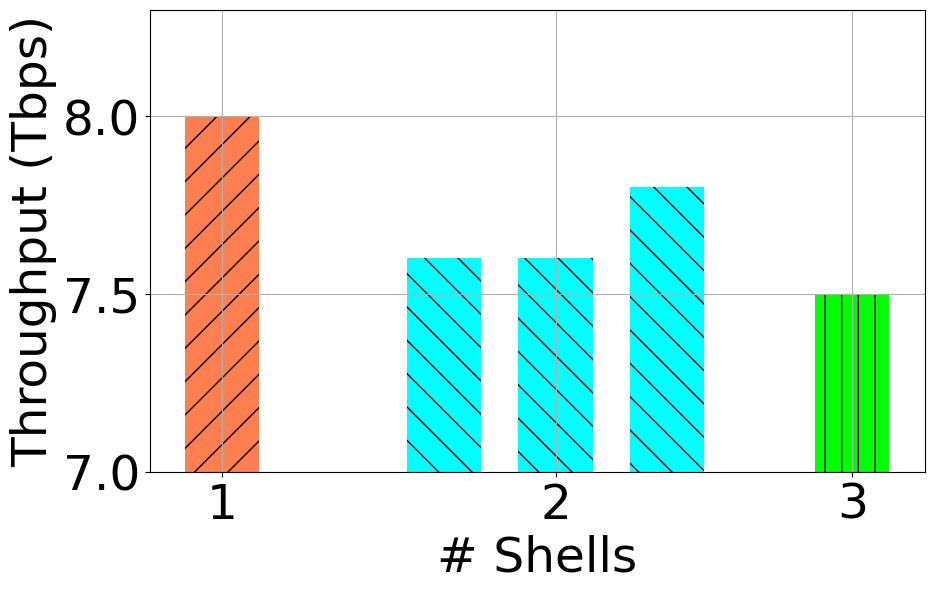

In [4]:
plt.rcParams["figure.figsize"] = (17, 10)
plt.rcParams.update({'font.size': 35})

color = ['coral', 'aqua', 'lime']

# Data for the bar plot
groups = ['1', '2', '3']
# group_3 = [round(8015.2/1000, 1)]  # Single bar in Group 3
# group_2 = [round(7651.42/1000, 1), round(7774.797/1000, 1),
#            round(7607.054/1000, 1)]  # Three bars in Group 2
# group_1 = [round(7494.9/1000, 1)]  # Single bar in Group 1

# Combine the data into a single list for convenience
all_data = [
    read_csv_for_bar_plot('CSVs/multi_shell_design/STARLINK_single_shell_design.csv'), 
    read_csv_for_bar_plot('CSVs/multi_shell_design/STARLINK_two_shell_design.csv'),
    read_csv_for_bar_plot('CSVs/multi_shell_design/STARLINK_three_shell_design.csv')
]

# Number of groups
n_groups = len(groups)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Positions for the groups
group_positions = [1.3, 2, 3]

# Width of the bars
bar_width = 0.2

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

# Loop over each group and plot the bars
for i, group_data in enumerate(all_data):
    # Calculate the positions for the bars in this group
    positions = np.arange(len(group_data)) * bar_width + group_positions[i]
    print(positions)
    if len(positions) > 1:
        positions[0] -= 0.1
        # positions[1]+=0.1
        positions[2] += 0.1
    print(positions)
    bars = ax.bar(positions, group_data, width=bar_width,
                  label=f'{groups[i]}', color=color[i], hatch=hatches[i])

    # # Annotate bars with values
    # for bar in bars:
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('# Shells')
ax.set_ylabel('Throughput (Tbps)')
ax.set_xticks([1.3, 2.2, 3])
ax.set_xticklabels(groups)
ax.set_ylim(7, 8.3)
# Add legend
# ax.legend(loc=0,ncol=2, framealpha=0.3)
plt.grid()
# plt.savefig('figures/intershell_ISLs/starlink_shell_merge.png')
plt.show()

### Kuiper

[[7.2], [6.6, 7.0, 6.8], [6.5]]
[1.3]
[1.3]
[2.  2.2 2.4]
[1.9 2.2 2.5]
[3.]
[3.]


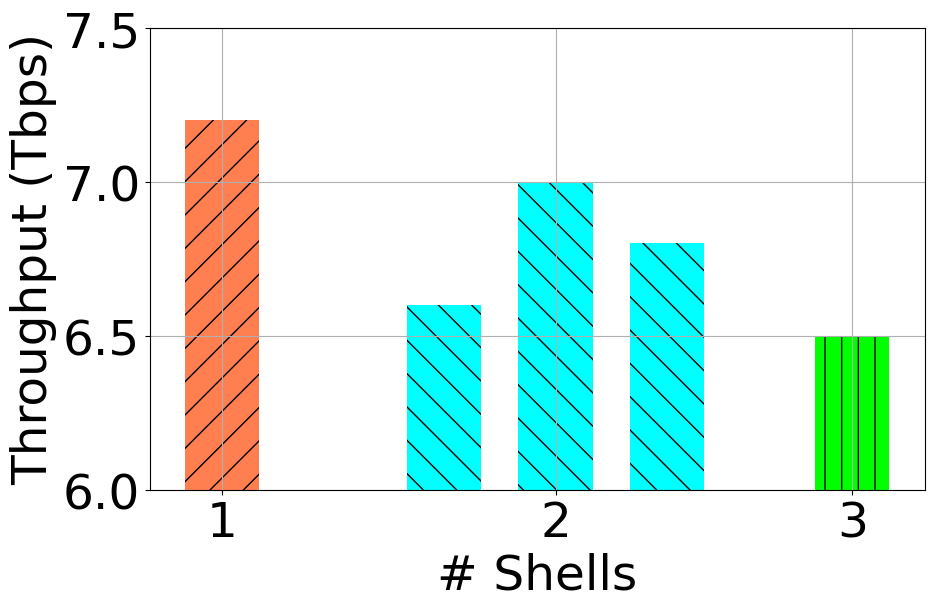

In [5]:
plt.rcParams["figure.figsize"] = (17, 10)
plt.rcParams.update({'font.size': 35})

color = ['coral', 'aqua', 'lime']

# Data for the bar plot
groups = ['1', '2', '3']
# group_3 = [round(7339.5/1000, 1)]  # Single bar in Group 3
# group_2 = [round(6761.52/1000, 1), round(6780.394/1000, 1),
#            round(6955.889/1000, 1)]  # Three bars in Group 2
# group_1 = [round(6592.1/1000, 1)]  # Single bar in Group 1

# Combine the data into a single list for convenience
all_data = [
    read_csv_for_bar_plot('CSVs/multi_shell_design/KUIPER_single_shell_design.csv'), 
    read_csv_for_bar_plot('CSVs/multi_shell_design/KUIPER_two_shell_design.csv'),
    read_csv_for_bar_plot('CSVs/multi_shell_design/KUIPER_three_shell_design.csv')
]
print(all_data)

# Number of groups
n_groups = len(groups)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Positions for the groups
group_positions = [1.3, 2, 3]

# Width of the bars
bar_width = 0.2

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

# Loop over each group and plot the bars
for i, group_data in enumerate(all_data):
    # Calculate the positions for the bars in this group
    positions = np.arange(len(group_data)) * bar_width + group_positions[i]
    print(positions)
    if len(positions) > 1:
        positions[0] -= 0.1
        # positions[1]+=0.1
        positions[2] += 0.1
    print(positions)
    bars = ax.bar(positions, group_data, width=bar_width,
                  label=f'{groups[i]}', color=color[i], hatch=hatches[i])

    # # Annotate bars with values
    # for bar in bars:
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('# Shells')
ax.set_ylabel('Throughput (Tbps)')
ax.set_xticks([1.3, 2.2, 3])
ax.set_xticklabels(groups)
ax.set_ylim(6, 7.5)
# Add legend
# ax.legend(loc=0, ncol=2, framealpha=0.3)
plt.grid()
# plt.savefig('figures/intershell_ISLs/kuiper_shell_merge.png')
plt.show()

Performance over 24 hours after optimizing entire budget into a single shell

8013.126597710094


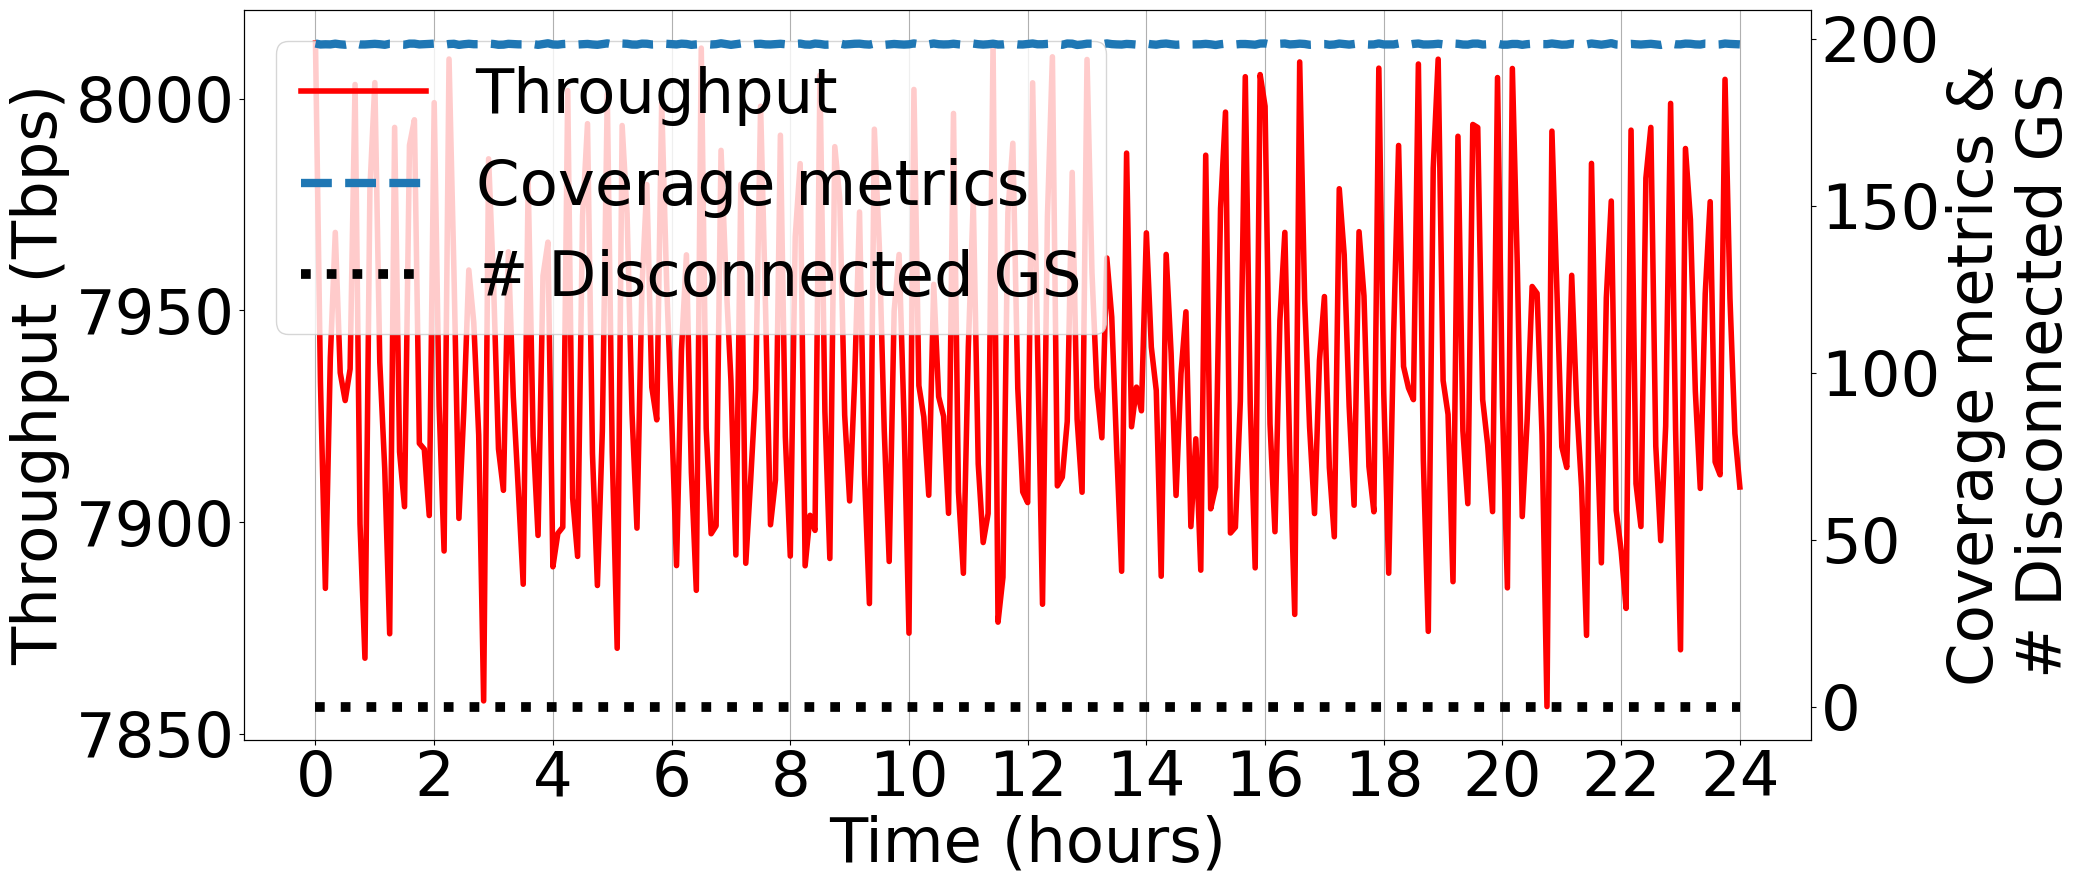

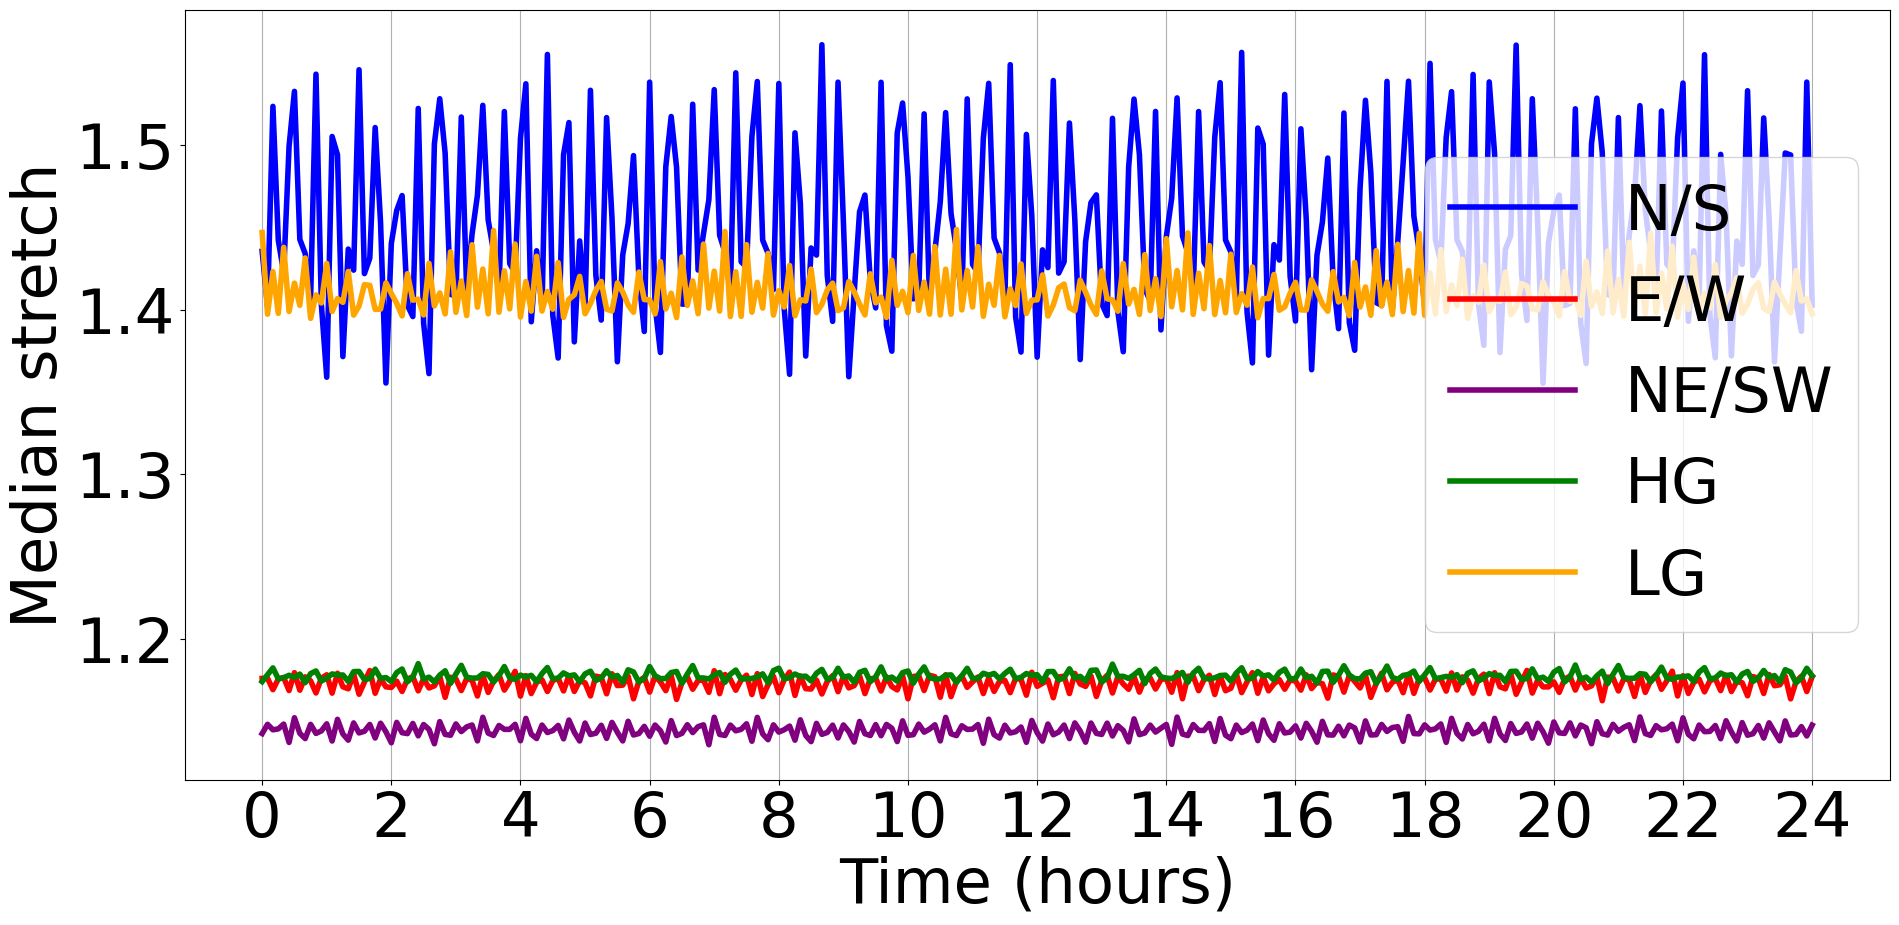

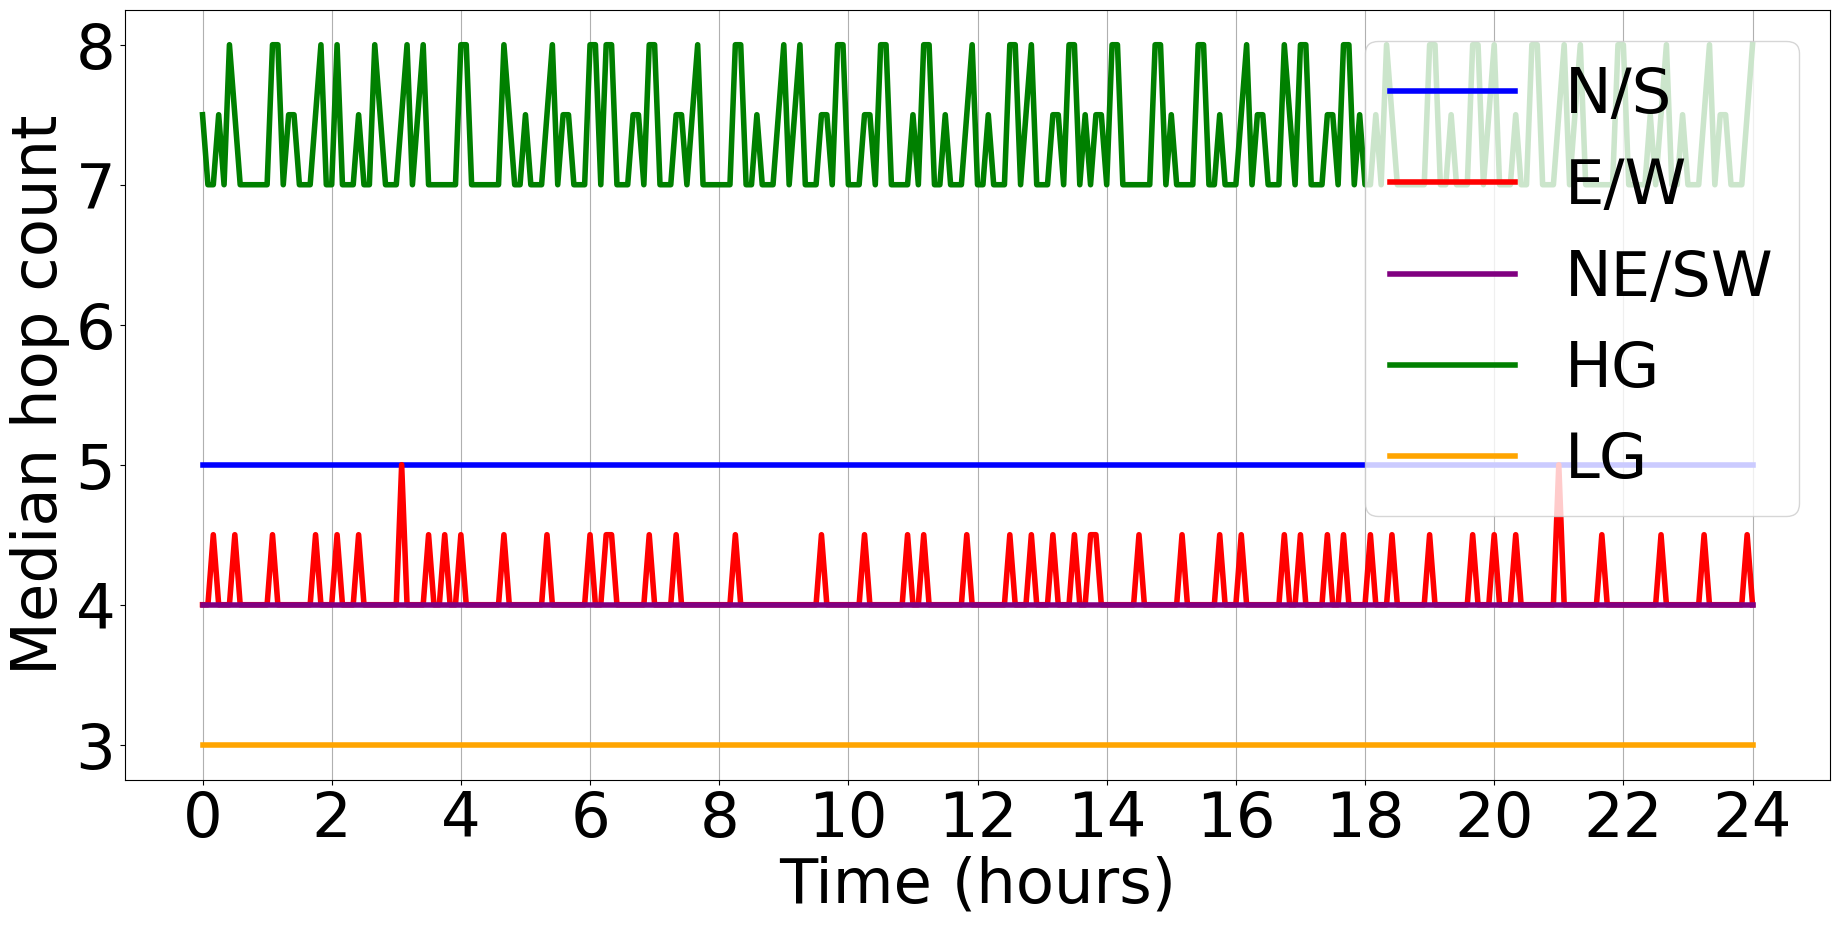

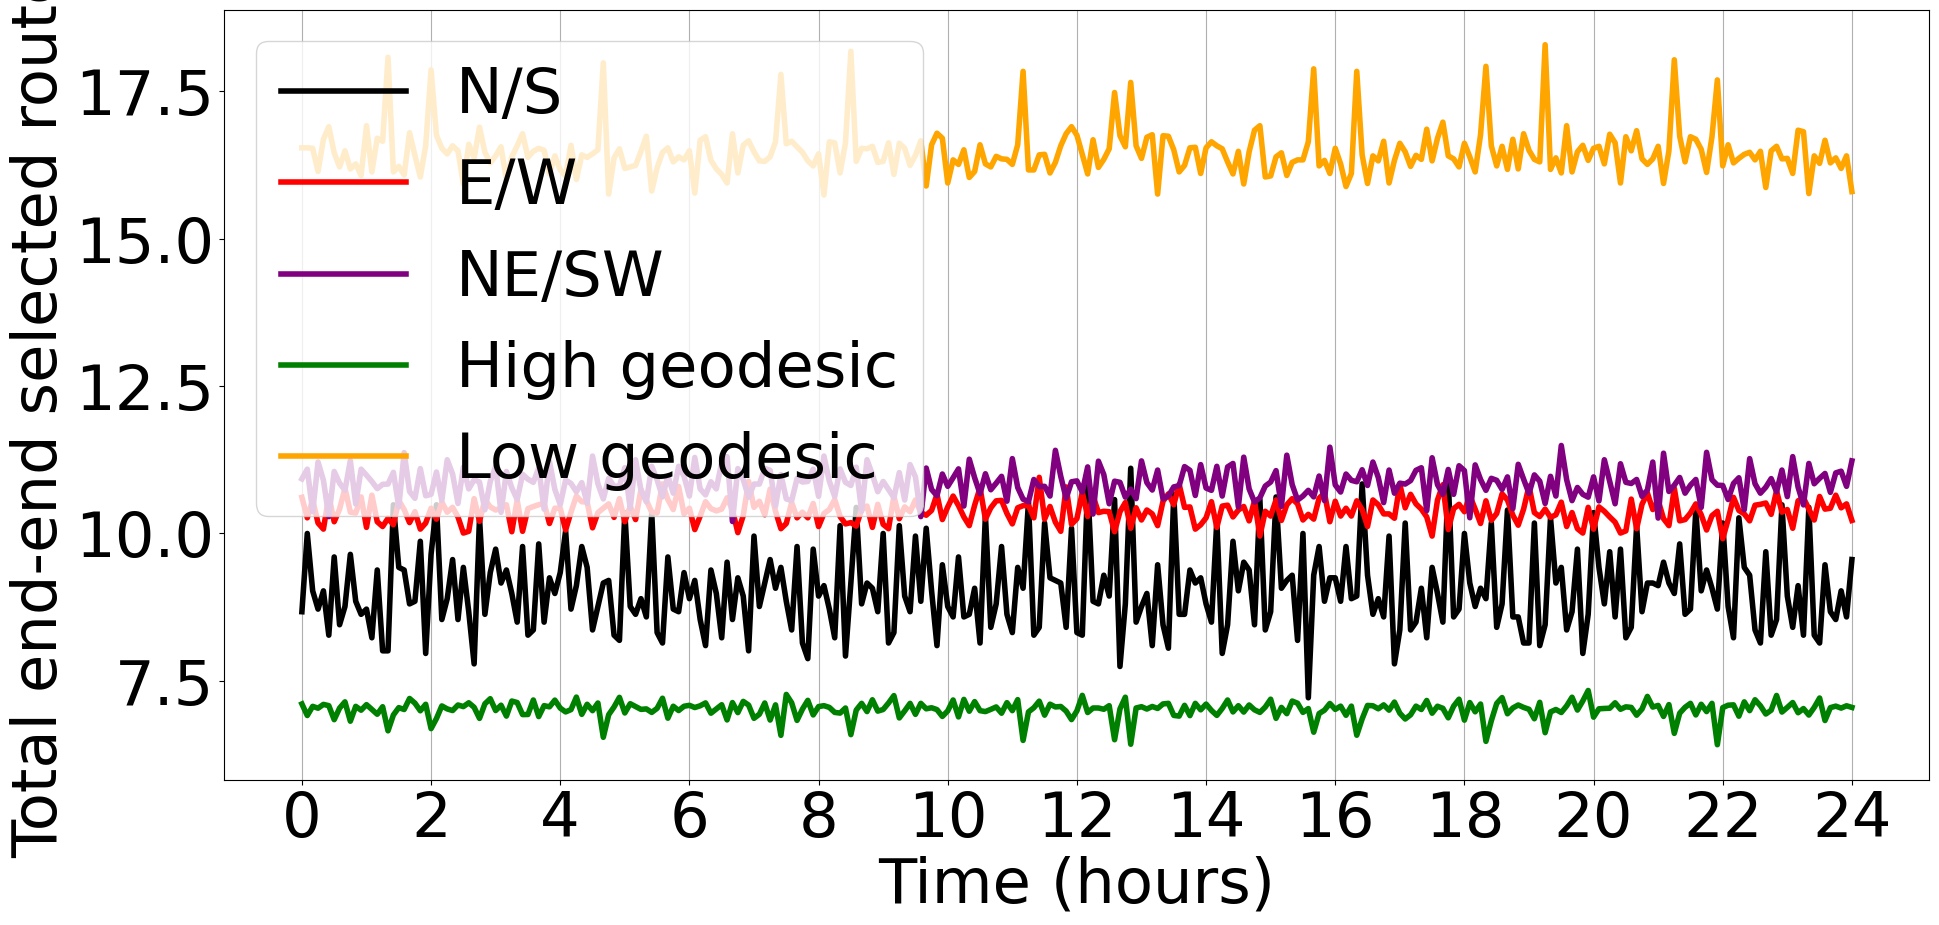

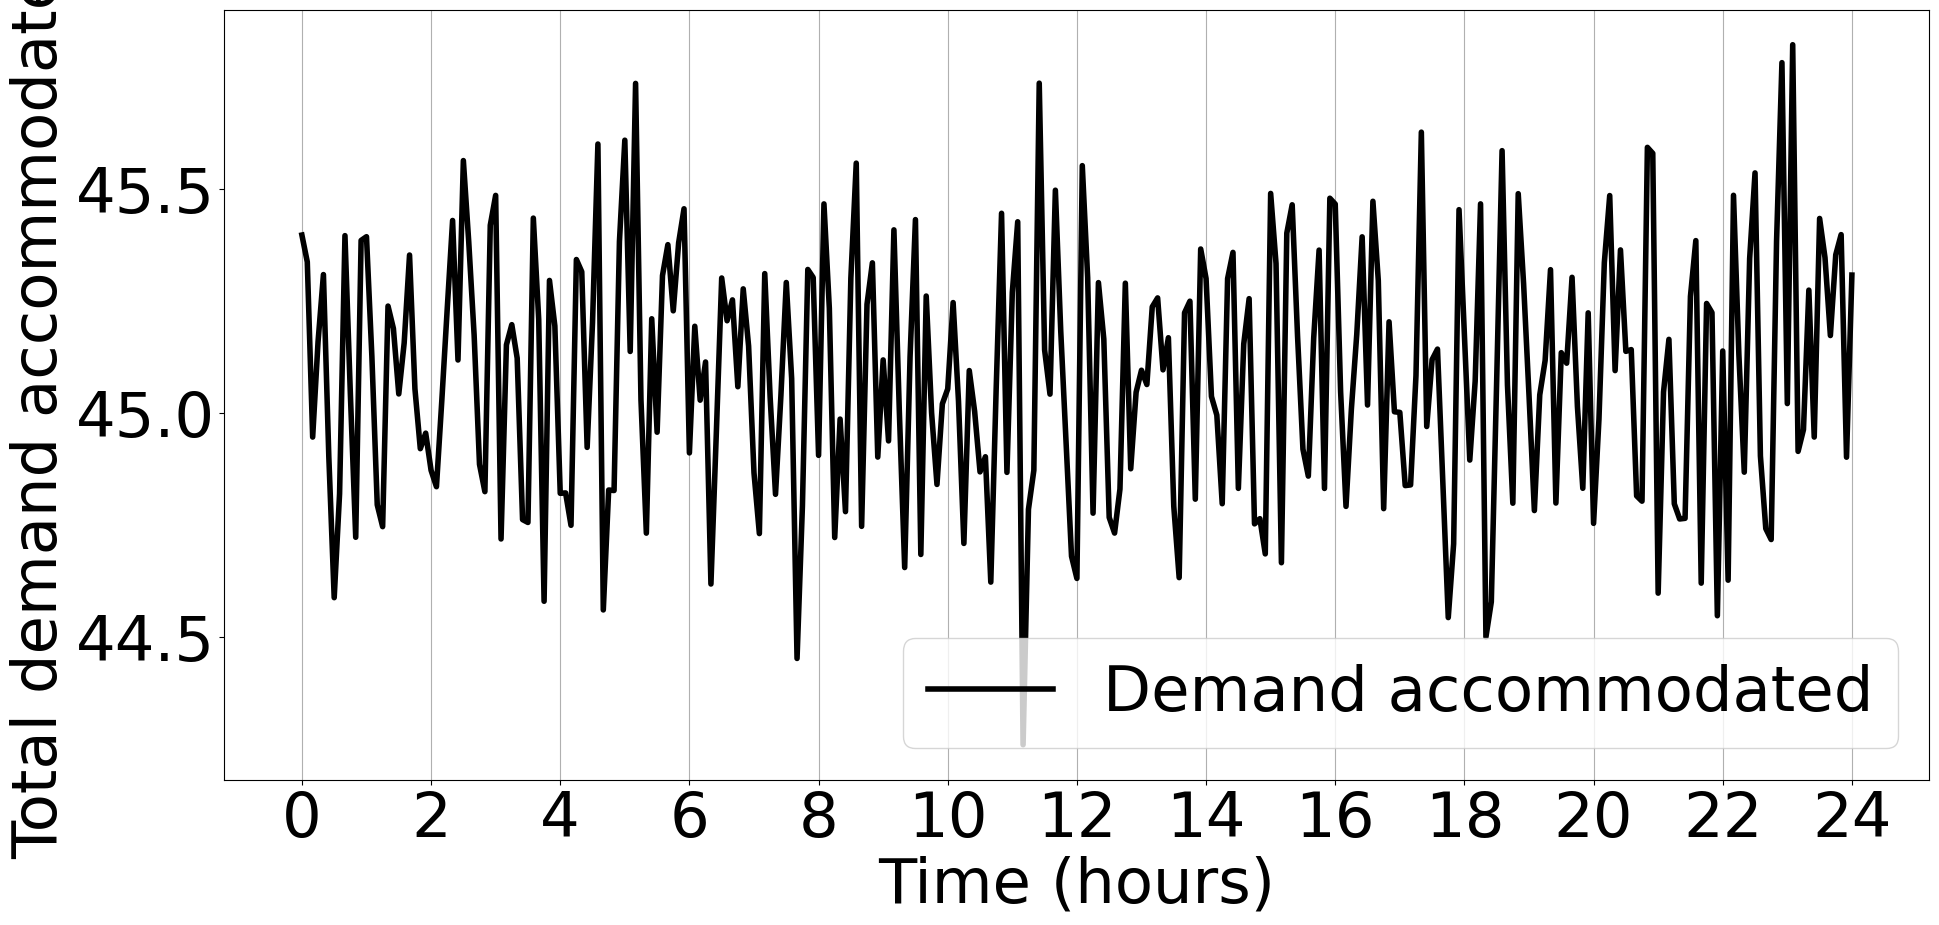

In [5]:
plt.rcParams["figure.figsize"] = (22, 10)
plt.rcParams.update({'font.size': 45})


df = pd.read_csv(
    'CSVs/multi_shell_design/SS_ISL_h_24.csv'
).sort_values(by='time_delta')
df['time_delta'] = df['time_delta']*24

print(df['throughput_Gbps'].max())

x_line = [h for h in range(0, 25, 2)]
fig, ax1 = plt.subplots()
ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')

# Throughput
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Throughput (Tbps)')
line2 = ax1.plot(df['time_delta'], df['throughput_Gbps'],
                 label='Throughput', color='r', linewidth=4)
ax1.tick_params(axis='y')

# Coverage
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# we already handled the x-label with ax1
ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
line3 = ax2.plot(df['time_delta'], df['GS_coverage_metric'],
                 label='Coverage metrics', linestyle='dashed', linewidth=6)
line4 = ax2.plot(df['time_delta'], df['dead_GS_count'],
                 label='# Disconnected GS', linestyle='dotted', color='black', linewidth=7)
ax2.tick_params(axis='y')
fig.tight_layout()
lines = line2+line3+line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)
plt.show()

# Stretch
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median stretch")
plt.plot(df['time_delta'], df['NS_sth'],
         label='N/S',     color='Blue', linewidth=4)
plt.plot(df['time_delta'], df['EW_sth'],
         label='E/W',     color='Red', linewidth=4)
plt.plot(df['time_delta'], df['NESW_sth'],
         label='NE/SW', color='Purple', linewidth=4)
plt.plot(df['time_delta'], df['HG_sth'],
         label='HG',      color='Green',  linewidth=4)
plt.plot(df['time_delta'], df['LG_sth'], label='LG',
         color='Orange',  linewidth=4)
plt.legend()
plt.show()

# Hop count
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median hop count")
plt.plot(df['time_delta'], df['NS_cnt'],
         label='N/S',     color='Blue',  linewidth=4)
plt.plot(df['time_delta'], df['EW_cnt'],
         label='E/W',     color='Red',  linewidth=4)
plt.plot(df['time_delta'], df['NESW_cnt'],
         label='NE/SW', color='Purple', linewidth=4)
plt.plot(df['time_delta'], df['HG_cnt'],
         label='HG',      color='Green', linewidth=4)
plt.plot(df['time_delta'], df['LG_cnt'],
         label='LG',      color='Orange', linewidth=4)
plt.legend()
plt.show()


# Total end to end selected routes
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total end-end selected routes")

ax1.plot(df['time_delta'], df['NS_selt'],
         label='N/S', color='black', linewidth=4)
ax1.plot(df['time_delta'], df['EW_selt'],
         label='E/W', color='Red', linewidth=4)
ax1.plot(df['time_delta'], df['NESW_selt'],
         label='NE/SW', color='Purple', linewidth=4)
ax1.plot(df['time_delta'], df['HG_selt'],
         label='High geodesic', color='Green', linewidth=4)
ax1.plot(df['time_delta'], df['LG_selt'],
         label='Low geodesic', color='Orange', linewidth=4)

ax1.legend()
plt.show()


# Total demand accommodated
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total demand accommodated")
ax1.plot(df['time_delta'], df['total_accommodated_flow'],
         label='Demand accommodated', color='black', linewidth=4)
ax1.legend()
plt.show()

Performance over 24 hours with inter shell ISLs across three shells

8002.83623742446


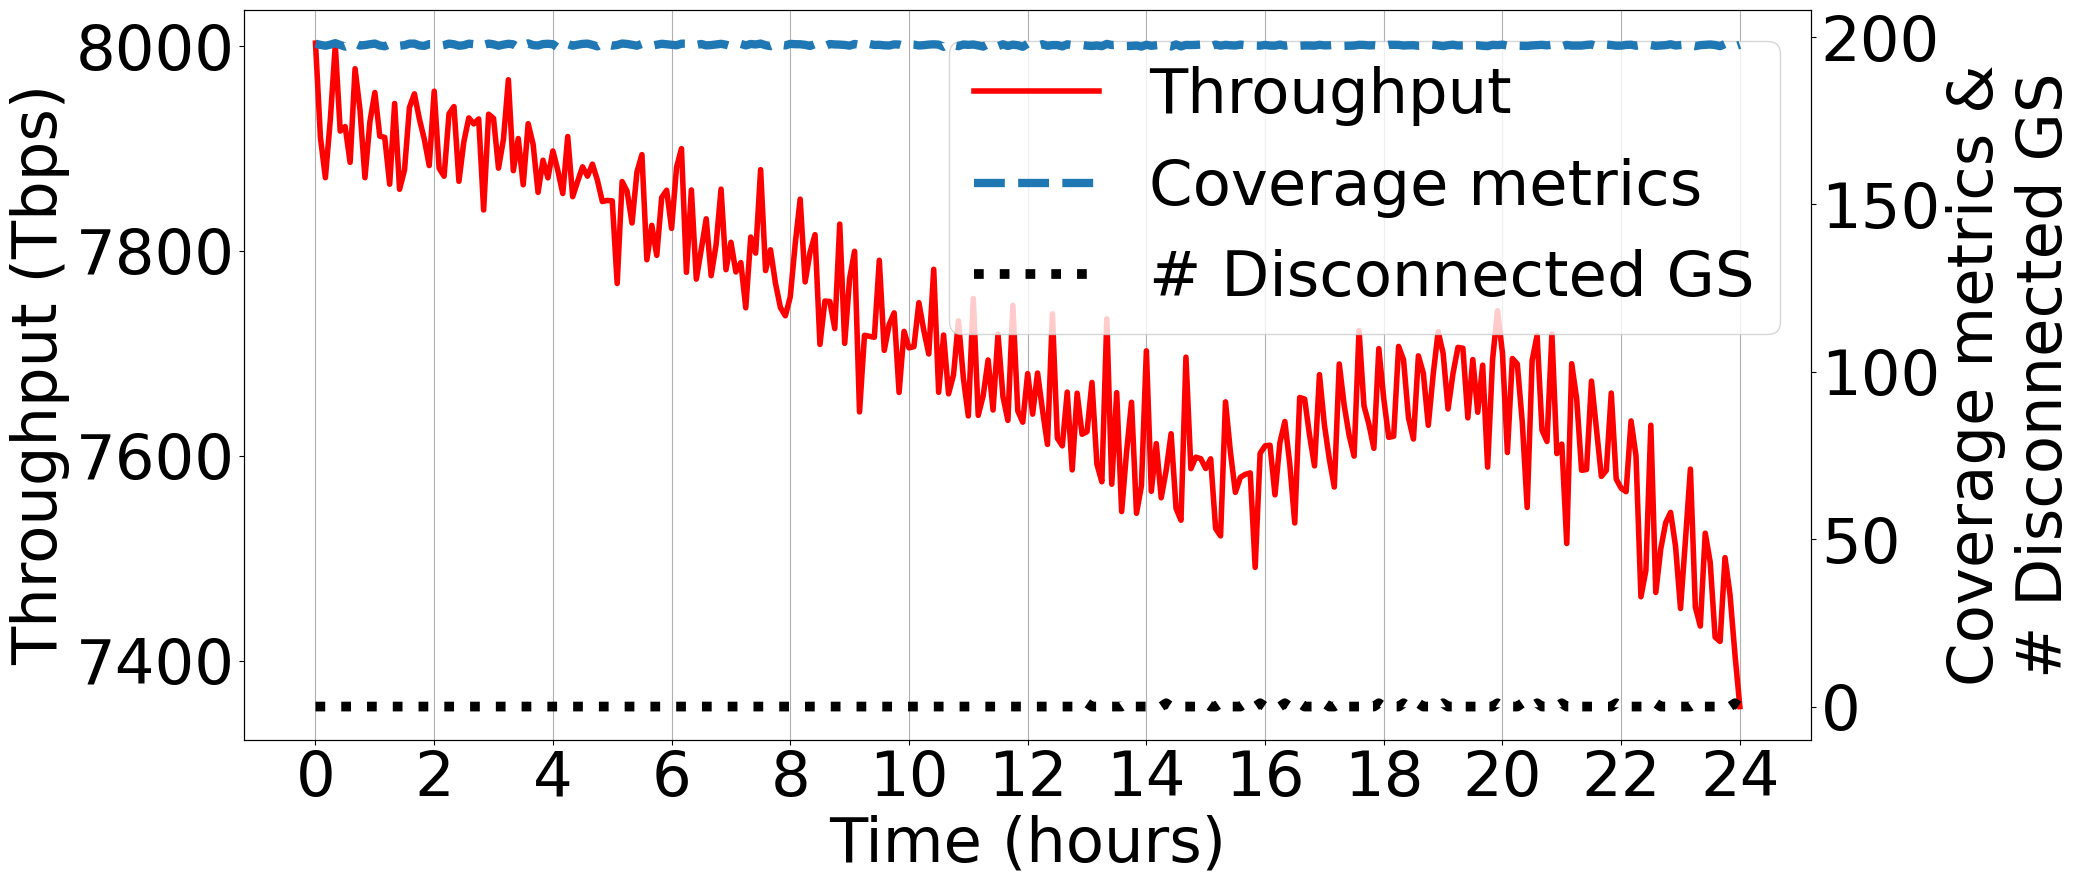

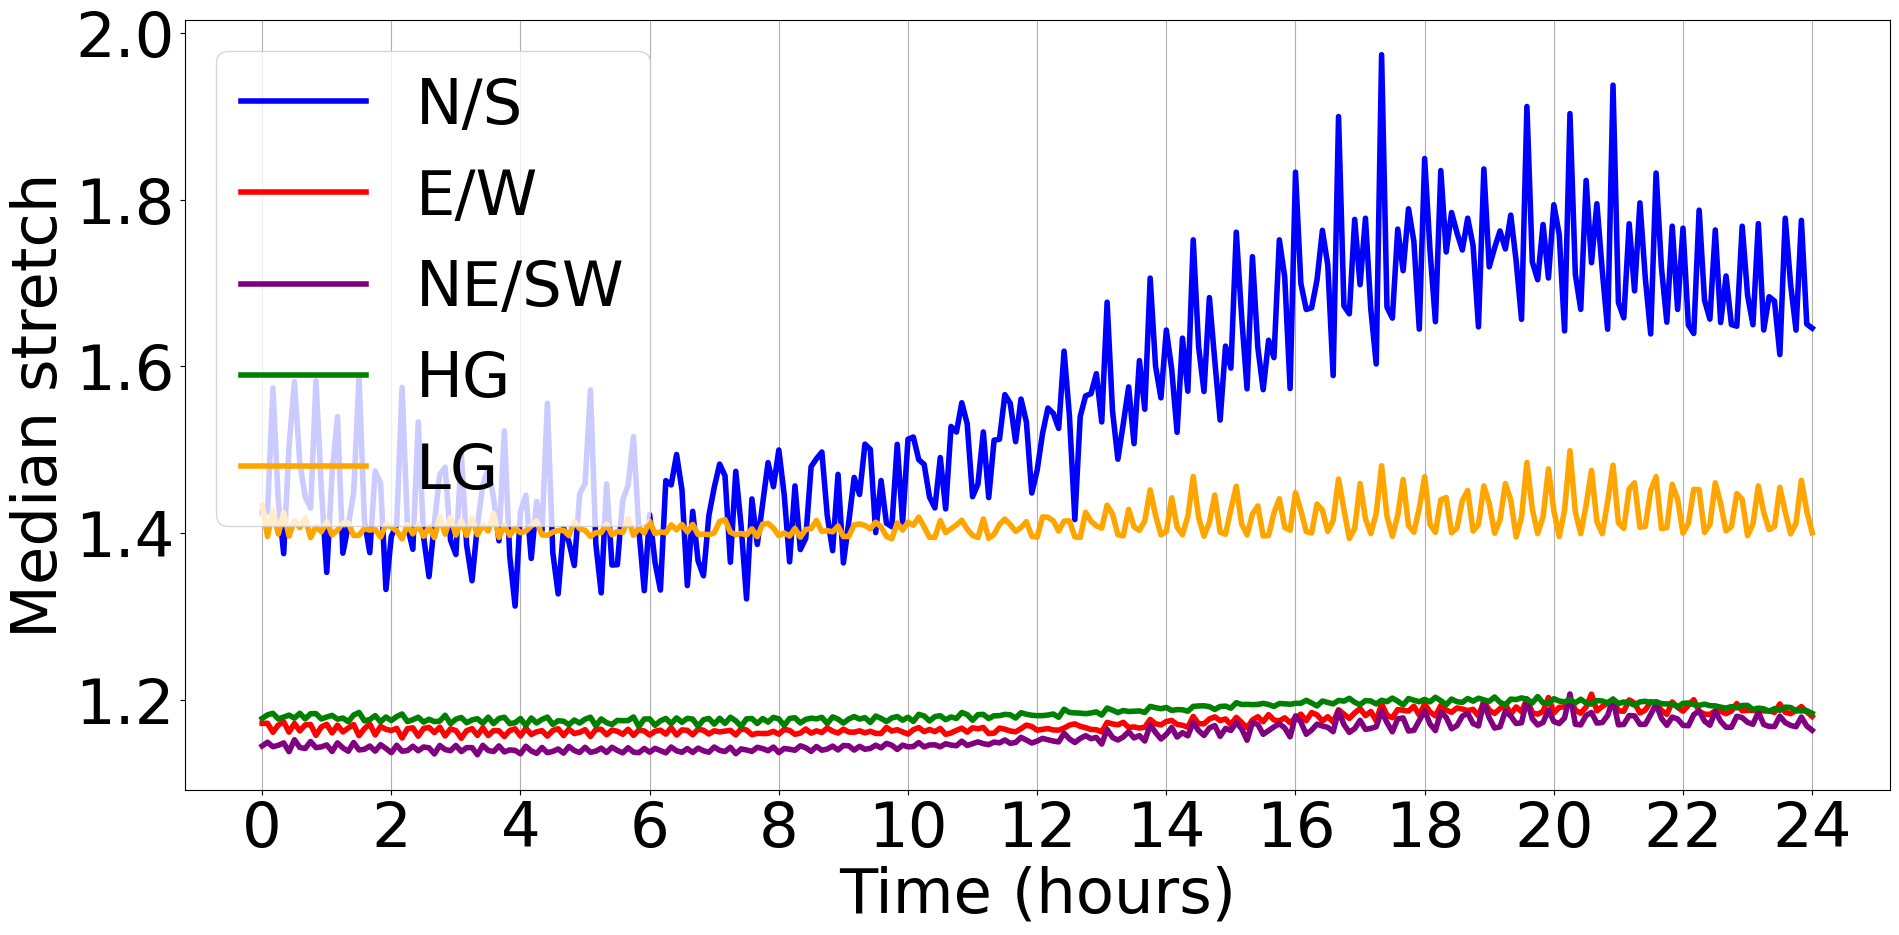

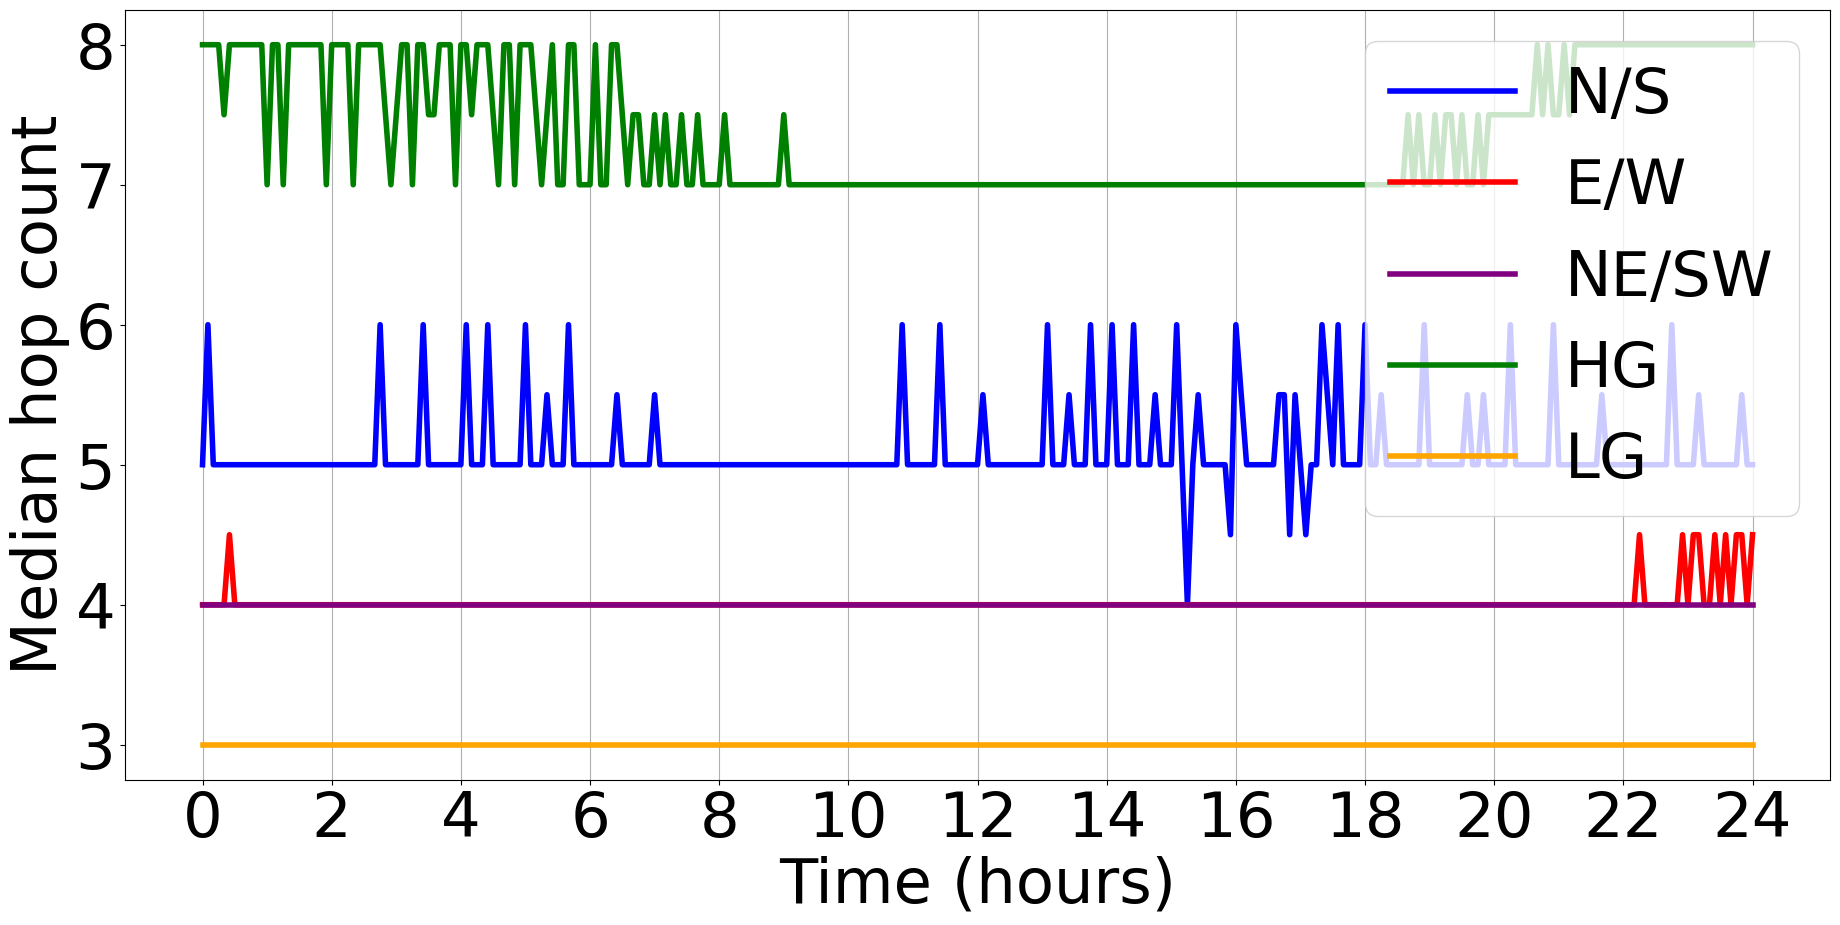

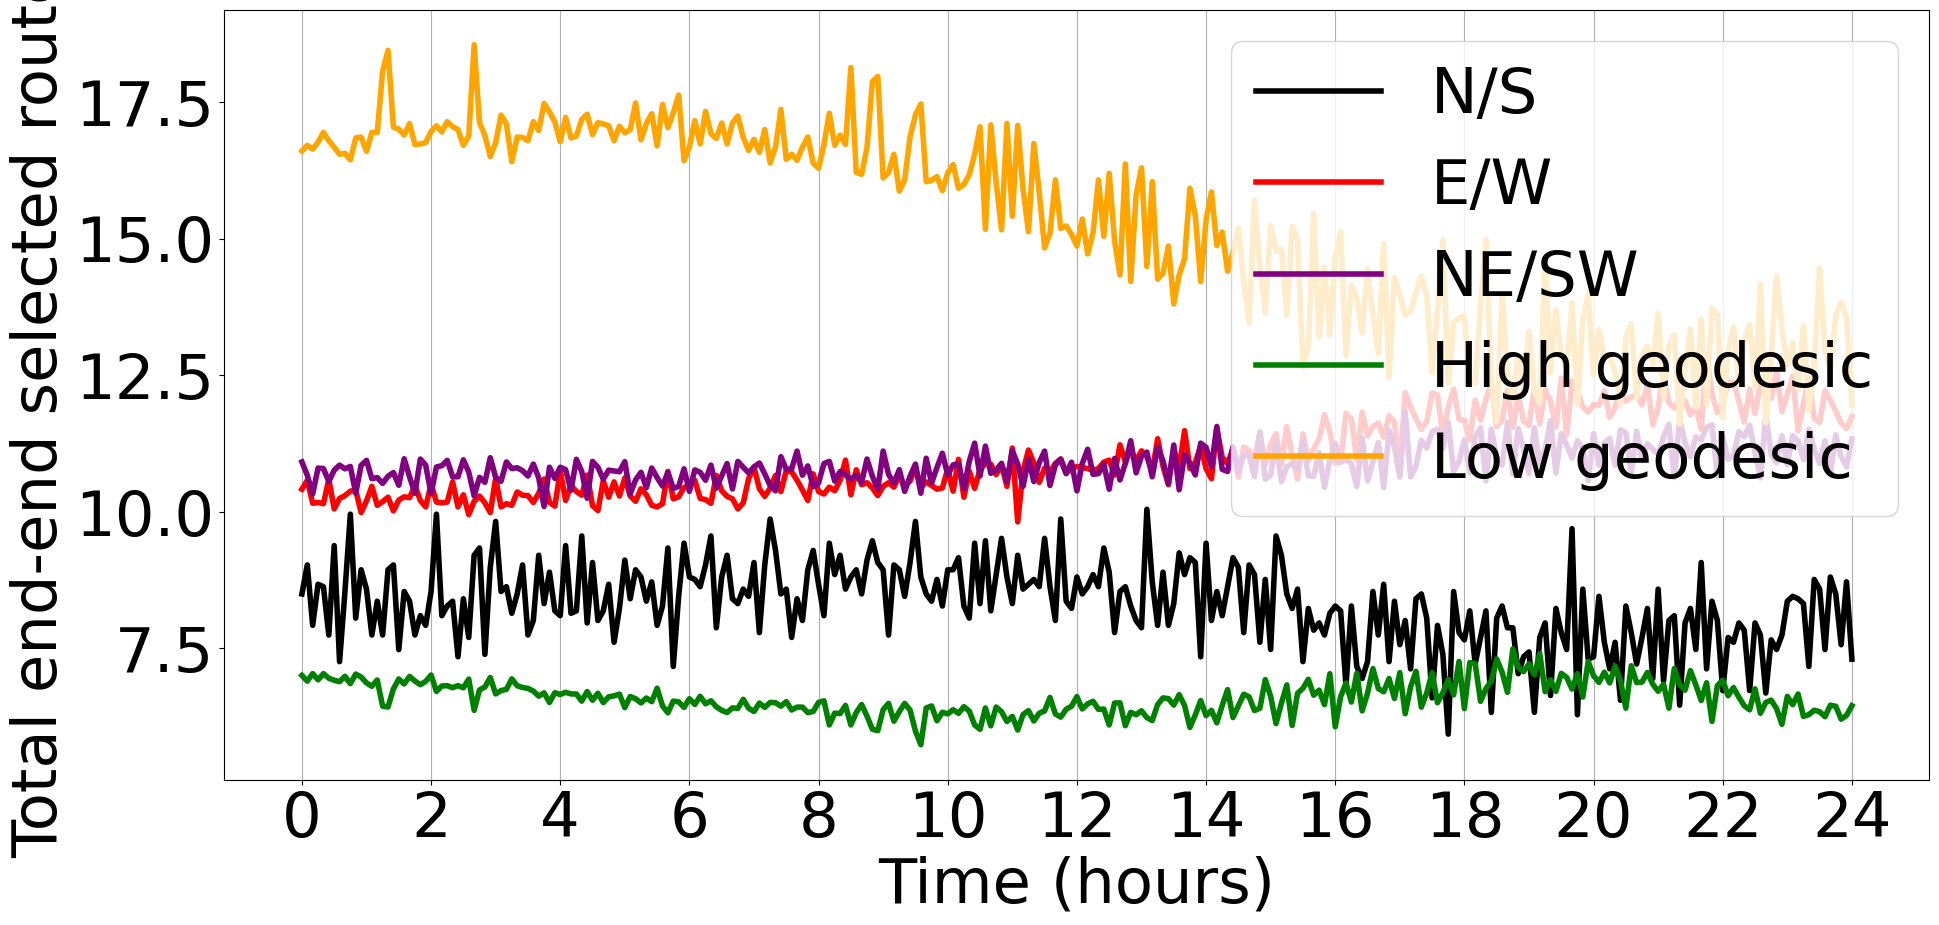

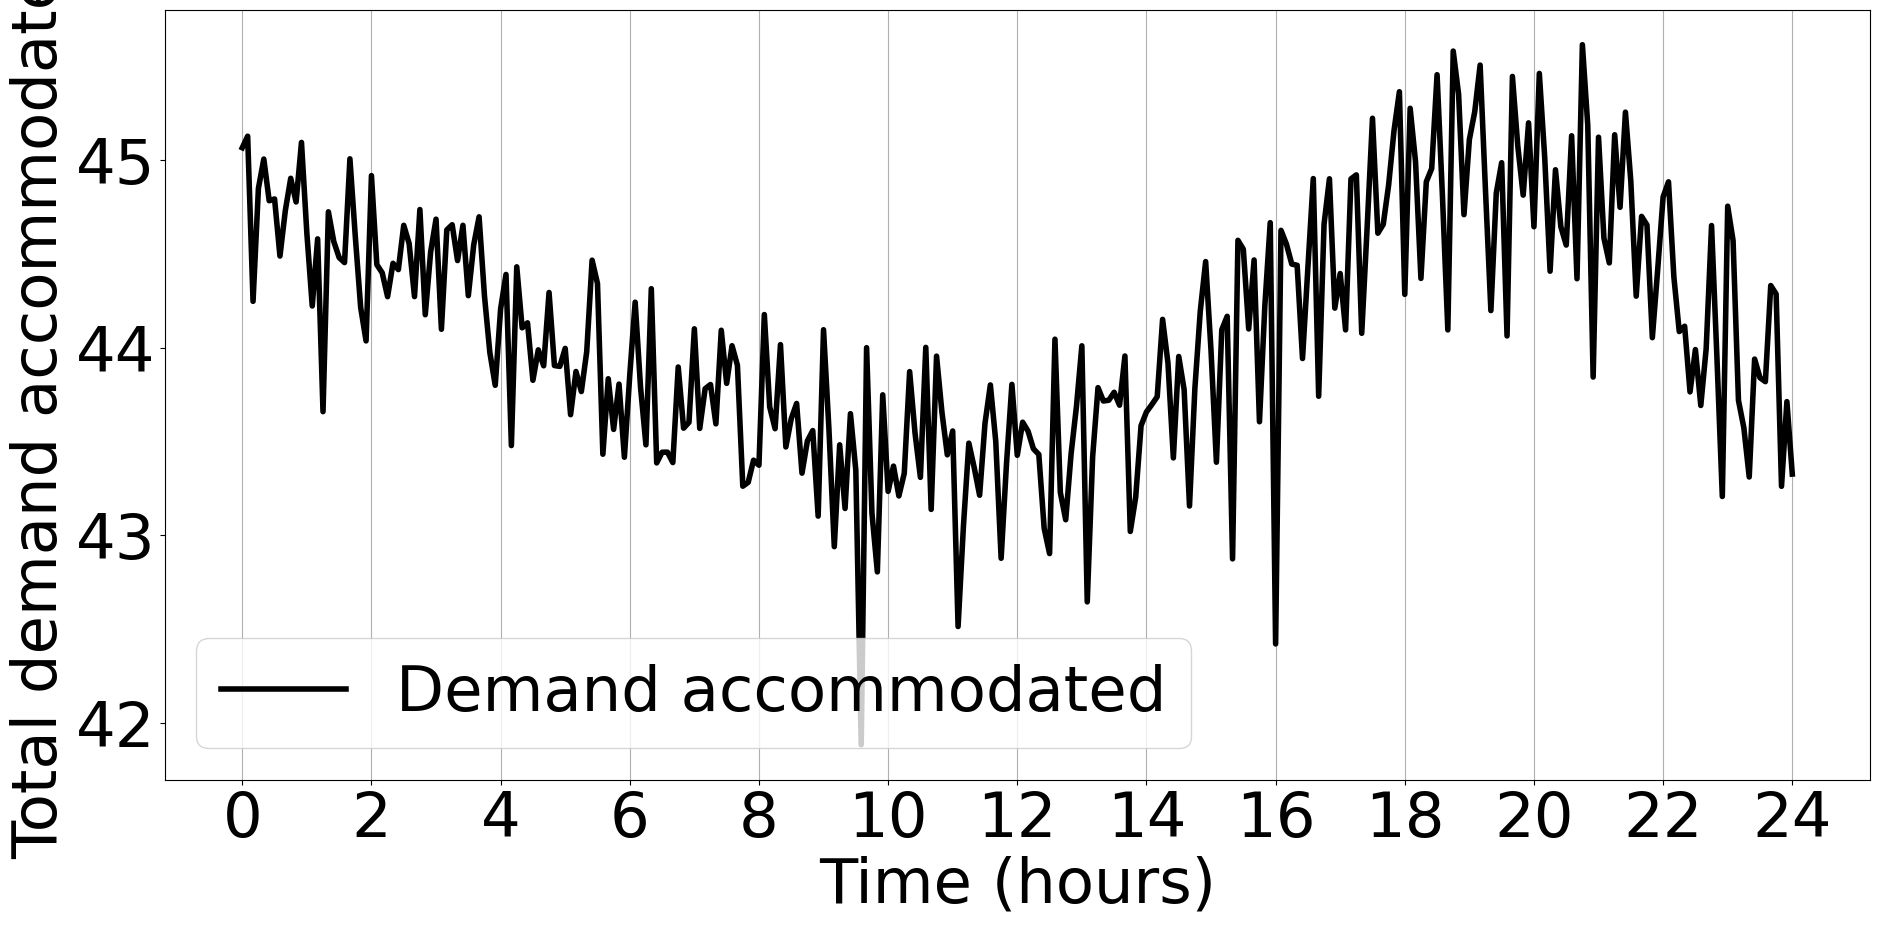

In [6]:
df = pd.read_csv(
    'CSVs/multi_shell_design/IS3_ISL_h_24.csv').sort_values(by='time_delta')
df['time_delta'] = df['time_delta']*24

print(df['throughput_Gbps'].max())

x_line = [h for h in range(0, 25, 2)]
fig, ax1 = plt.subplots()
ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')

# Throughput
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Throughput (Tbps)')
line2 = ax1.plot(df['time_delta'], df['throughput_Gbps'],
                 label='Throughput', color='r', linewidth=4)
ax1.tick_params(axis='y')

# Coverage
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# we already handled the x-label with ax1
ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
line3 = ax2.plot(df['time_delta'], df['GS_coverage_metric'],
                 label='Coverage metrics', linestyle='dashed', linewidth=6)
line4 = ax2.plot(df['time_delta'], df['dead_GS_count'],
                 label='# Disconnected GS', linestyle='dotted', color='black', linewidth=7)
ax2.tick_params(axis='y')
fig.tight_layout()
lines = line2+line3+line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)
plt.show()

# Stretch
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median stretch")
plt.plot(df['time_delta'], df['NS_sth'],
         label='N/S',     color='Blue', linewidth=4)
plt.plot(df['time_delta'], df['EW_sth'],
         label='E/W',     color='Red', linewidth=4)
plt.plot(df['time_delta'], df['NESW_sth'],
         label='NE/SW', color='Purple', linewidth=4)
plt.plot(df['time_delta'], df['HG_sth'],
         label='HG',      color='Green',  linewidth=4)
plt.plot(df['time_delta'], df['LG_sth'], label='LG',
         color='Orange',  linewidth=4)
plt.legend()
plt.show()

# Hop count
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median hop count")
plt.plot(df['time_delta'], df['NS_cnt'],
         label='N/S',     color='Blue',  linewidth=4)
plt.plot(df['time_delta'], df['EW_cnt'],
         label='E/W',     color='Red',  linewidth=4)
plt.plot(df['time_delta'], df['NESW_cnt'],
         label='NE/SW', color='Purple', linewidth=4)
plt.plot(df['time_delta'], df['HG_cnt'],
         label='HG',      color='Green', linewidth=4)
plt.plot(df['time_delta'], df['LG_cnt'],
         label='LG',      color='Orange', linewidth=4)
plt.legend()
plt.show()


# Total end to end selected routes
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total end-end selected routes")

ax1.plot(df['time_delta'], df['NS_selt'],
         label='N/S', color='black', linewidth=4)
ax1.plot(df['time_delta'], df['EW_selt'],
         label='E/W', color='Red', linewidth=4)
ax1.plot(df['time_delta'], df['NESW_selt'],
         label='NE/SW', color='Purple', linewidth=4)
ax1.plot(df['time_delta'], df['HG_selt'],
         label='High geodesic', color='Green', linewidth=4)
ax1.plot(df['time_delta'], df['LG_selt'],
         label='Low geodesic', color='Orange', linewidth=4)

ax1.legend()
plt.show()


# Total demand accommodated
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total demand accommodated")
ax1.plot(df['time_delta'], df['total_accommodated_flow'],
         label='Demand accommodated', color='black', linewidth=4)
ax1.legend()
plt.show()